# Generates PCA scree plots from supplied eigenvalues
## First, enter in our input file (pickle file containing eigenvalues/eigenvectors)

In [1]:
# Input file:
input_file = "data/eig.pickle"

## Load in our eigenvalues, sort them, and calculate explained variance

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import _pickle as cPickle
# Set size of graphs:
eigs = cPickle.load(open(input_file, "rb"))
eig_vals = eigs[0]
eig_vecs = eigs[1]
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort() # Sort the (eigenvalue, eigenvector) tuples
eig_pairs.reverse() # Make the sorting from high to low
x_pcs = range(1, len(eig_pairs)+1) # Our x variable in the graphs
y_eig = [eig_pair[0] for eig_pair in eig_pairs]
tot = sum(y_eig)
var_exp = [(i / tot)*100 for i in y_eig]
cum_var_exp = np.cumsum(var_exp)
# Get number of principal components based on Kaiser's rule
num_pcs = len([i for i in y_eig if i > 1])
# Print out some summaries of our PCA
print("Number of PCs selected based on Kaiser's rule (eigenvalue > 1): {}".format(num_pcs))
print("Variance explained by PC1: {:.3}%; Variance explained by PC{}: {:.3}%".format(var_exp[0], num_pcs, var_exp[num_pcs-1]))
print("Cumulative variance explained for PC{}: {:.3}%".format(num_pcs, cum_var_exp[num_pcs-1]))

Number of PCs selected based on Kaiser's rule (eigenvalue > 1): 4632
Variance explained by PC1: 3.6%; Variance explained by PC4632: 0.00509%
Cumulative variance explained for PC4632: 82.2%


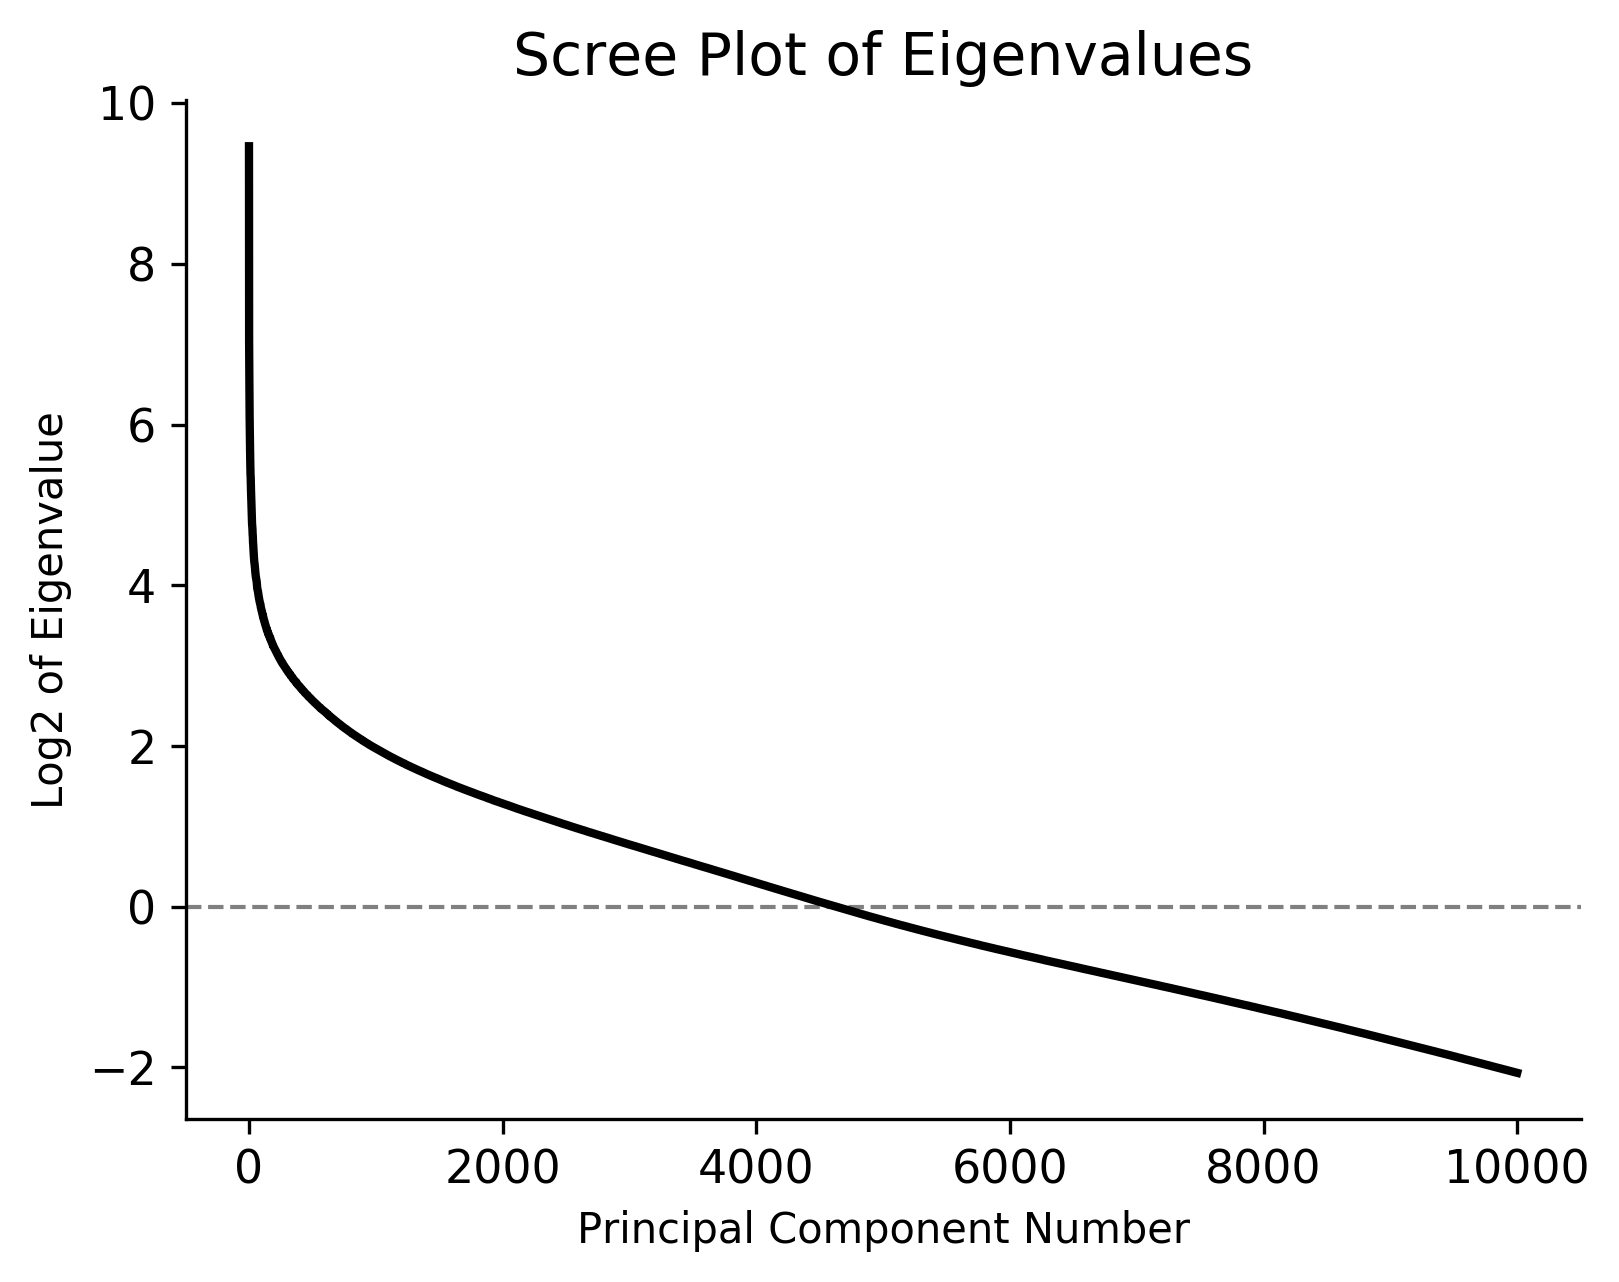

In [3]:
# Scree plot for eigenvalues
start_eig = 0 # Index of the principal component to start the graph at
end_eig = 10000 # Index of the principal component to end the graph at
x = x_pcs[start_eig:end_eig]
y = np.log2(y_eig[start_eig:end_eig])

plt.figure(figsize=(6, 4.5), dpi=300)
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Principal Component Number")
plt.ylabel("Log2 of Eigenvalue")
plt.title("Scree Plot of Eigenvalues", fontsize=14)  
plt.axhline(y=0, lw=1, color='gray', ls='--')

plt.plot(x, y, color='black', lw=2)

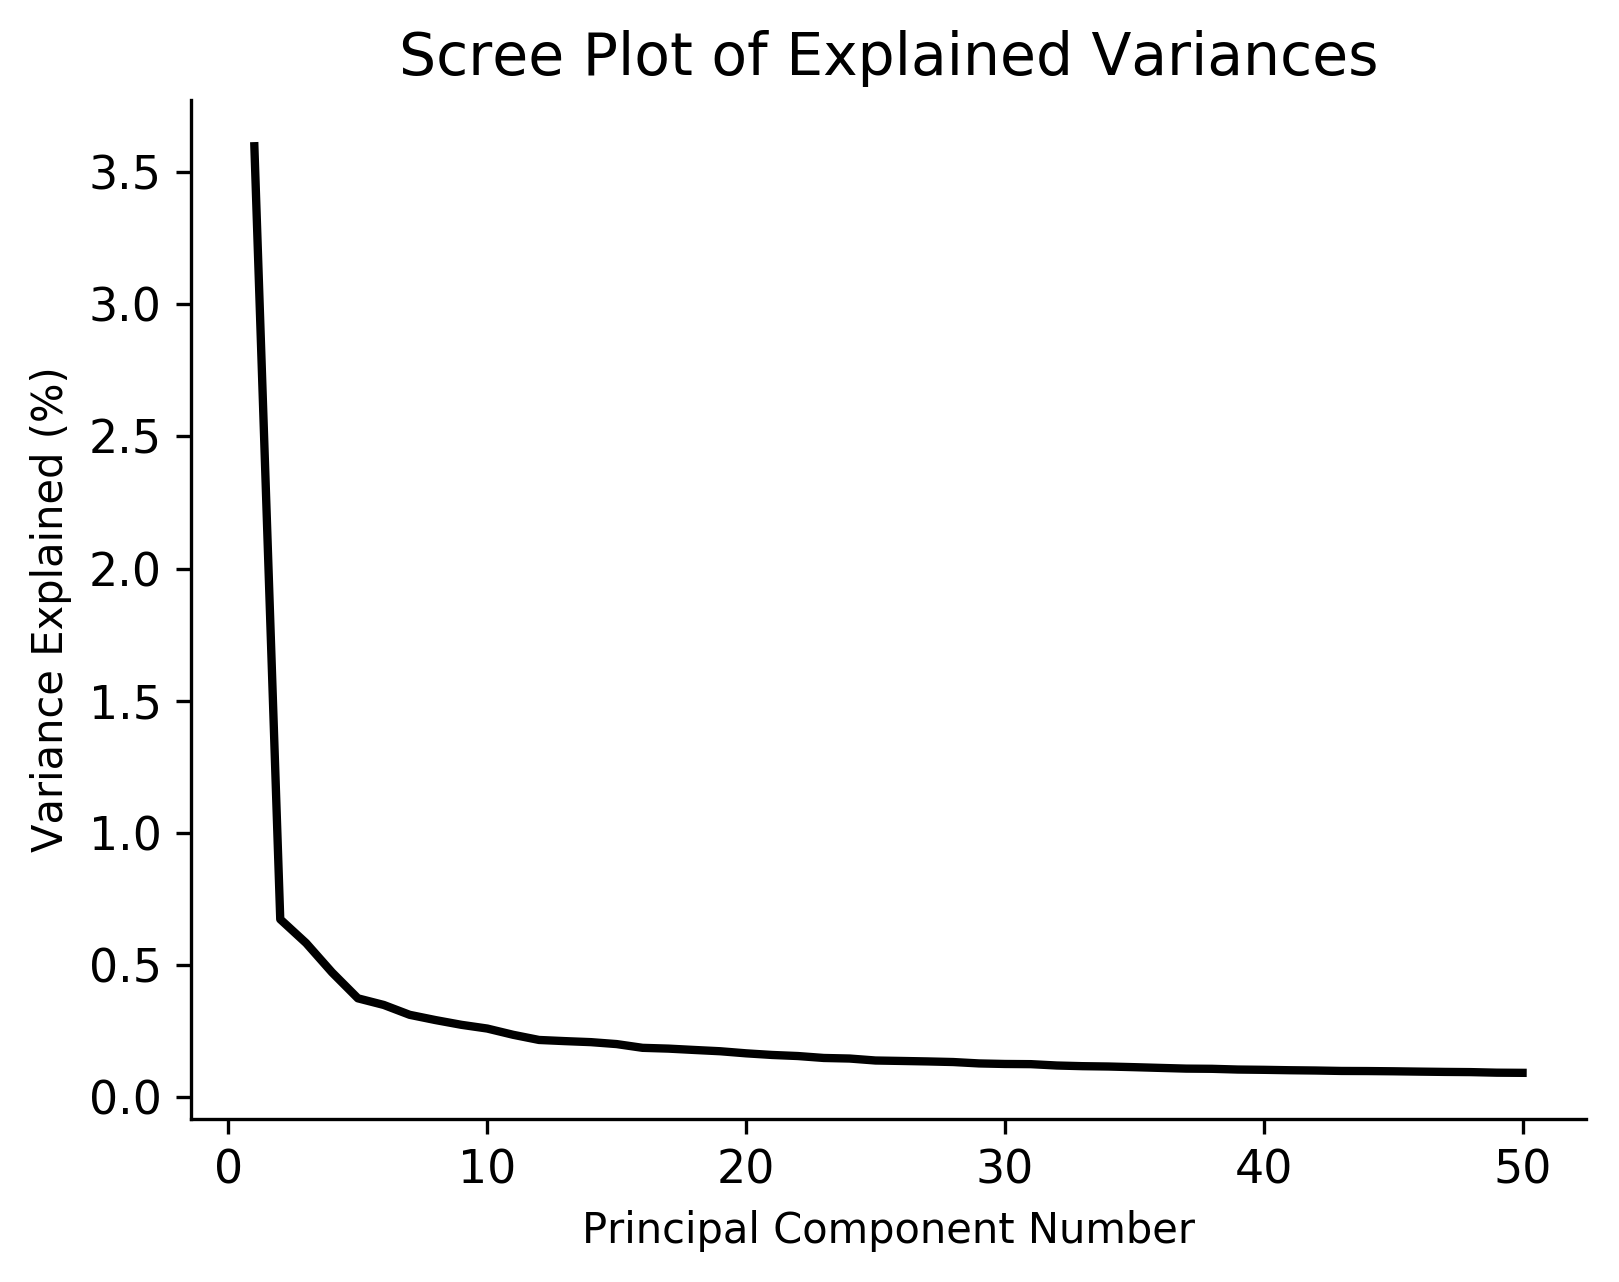

In [4]:
# Scree plot for variance explained
start_varexp = 0 # Index of the principal component to start the graph at
end_varexp = 50 # Index of the principal component to end the graph at
x = x_pcs[start_varexp:end_varexp]
y = var_exp[start_varexp:end_varexp]

plt.figure(figsize=(6, 4.5), dpi=300)
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Principal Component Number")
plt.ylabel("Variance Explained (%)")
plt.title("Scree Plot of Explained Variances", fontsize=14)  

plt.plot(x, y, lw=2, color='black')

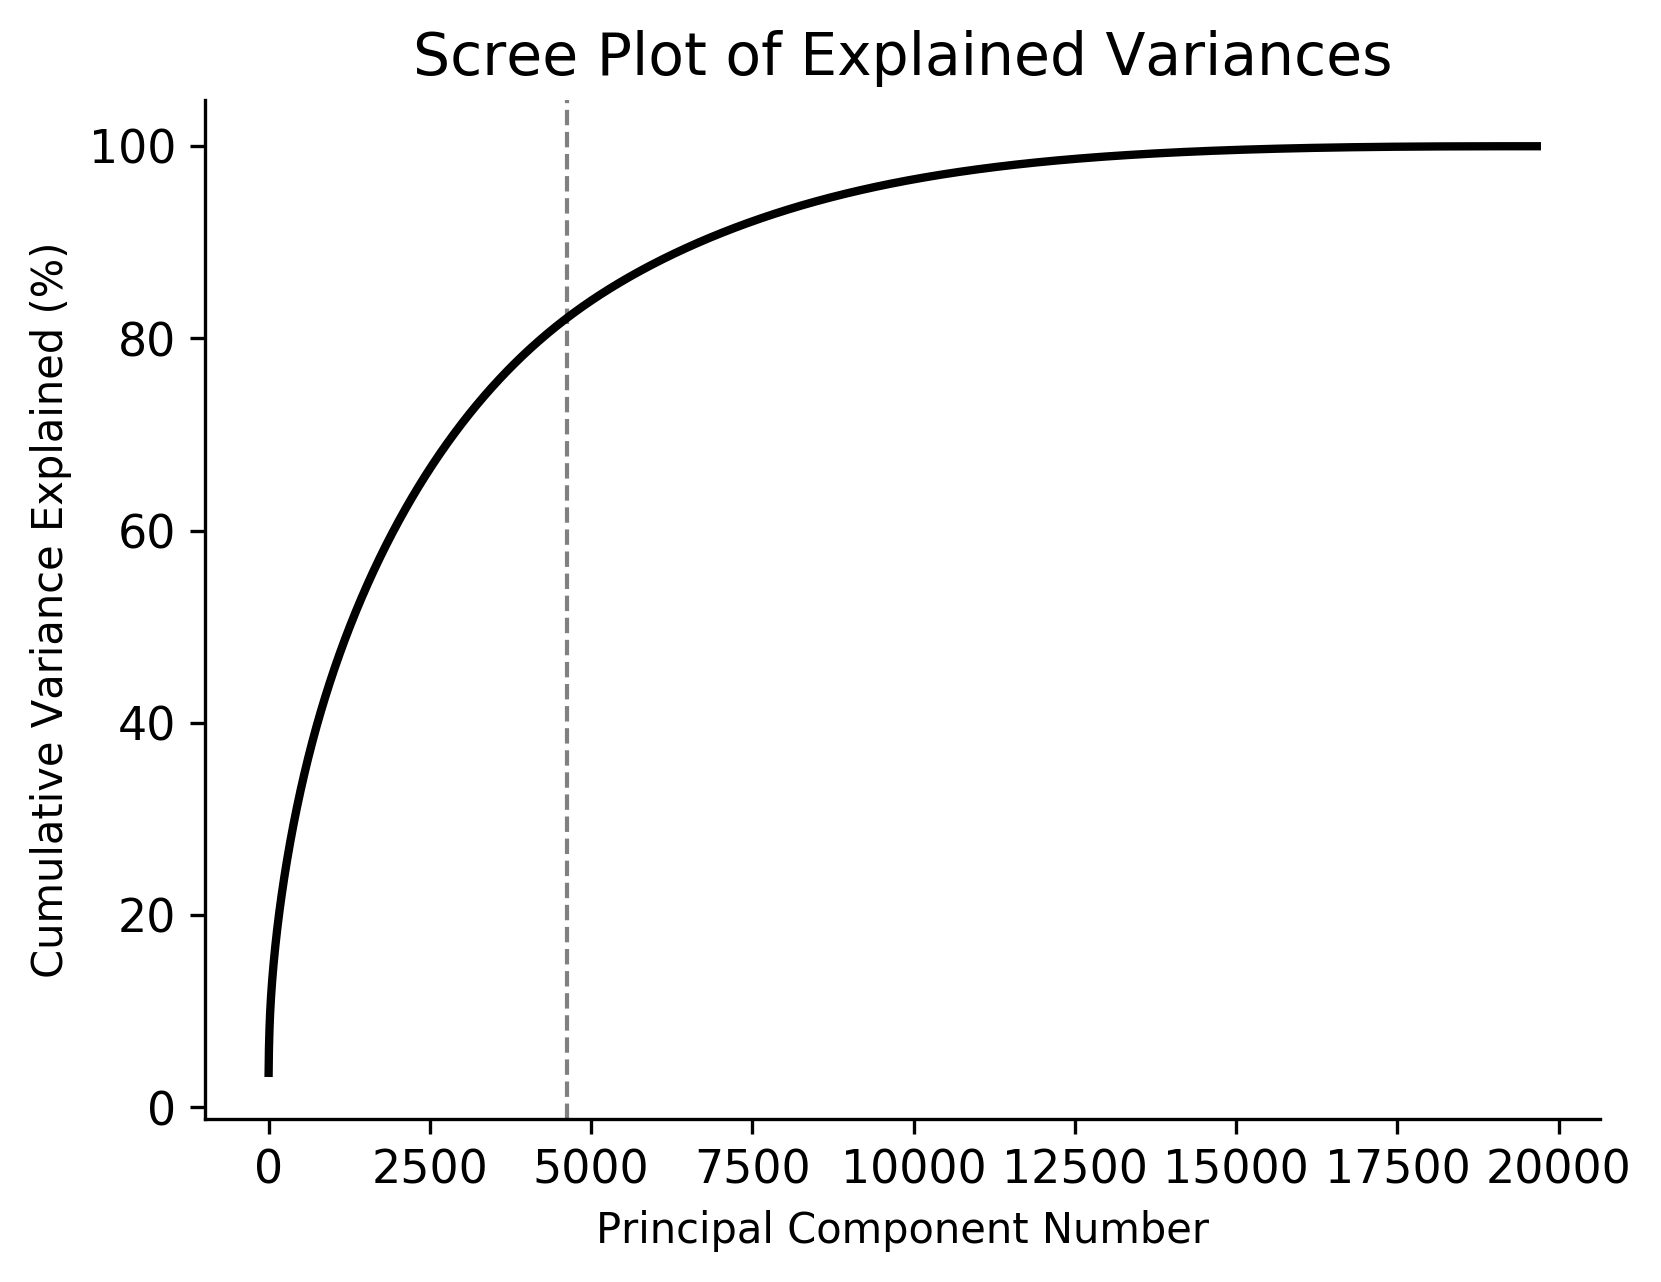

In [5]:
# Scree plot for cumulative variance explained
start_cumvar = 0 # Index of the principal component to start the graph at
end_cumvar = None # Index of the principal component to end the graph at
x = x_pcs[start_cumvar:end_cumvar]
y = cum_var_exp[start_cumvar:end_cumvar]

plt.figure(figsize=(6, 4.5), dpi=300)
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Principal Component Number")
plt.ylabel("Cumulative Variance Explained (%)")
plt.title("Cumulative Explained Variance", fontsize=14)  
plt.axvline(x=num_pcs, lw=1, color='gray', ls='--')

plt.plot(x, y, color='black', lw=2)